In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/2018701001'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
def PrecisionGraph(thresh_holds, precision, x, y):
    plt.plot(thresh_holds, precision, label = y)
    plt.ylabel(y)
    plt.title(x + ' Vs '+ y)
    plt.xlabel(x)
    plt.show()

In [0]:
import networkx as nx
import math
import sys

G = nx.DiGraph()

f = open(path+"/soc-sign-bitcoinalpha.csv","r")
for l in f:
    ls = l.strip().split(",")
    G.add_edge(int(ls[0]), int(ls[1]), weight = float(ls[2])/10) ## the weight should already be in the range of -1 to 1
f.close()

# print G[1][10]
# G.node[edge[0]]['pos']

In [7]:
#Initialing fairness and goodness
fairness = {}
goodness = {}

for edge in G.nodes():
    fairness[edge] = 1
    goodness[edge] = 1
t = -1
eps = sys.float_info.epsilon
k=1
j =1
while((k>eps)or(j>eps)):
    t+=1
    k = 0
    j = 0
    for edge in G.nodes():
        sumg = 0
        for inc,outg in G.in_edges(edge):
            sumg += fairness[inc]*G[inc][outg]['weight']
            sumg = float(sumg)/float(len(G.in_edges(edge)))
        k += abs(goodness[edge]-sumg)
        goodness[edge] = sumg
        sumf = 0
        for inc,outg in G.out_edges(edge):
            sumf += abs(G[inc][outg]['weight']-goodness[outg])
            sumf = float(sumf)/float(len(G.out_edges(edge))*2)
            sumf = 1 - sumf
        j += abs(fairness[edge]-sumf)
        fairness[edge] = sumf
  #         print sumf
    print t,k,j

0 3497.8554411 963.658456249
1 12.9625764386 60.9757329881
2 1.05400392294 1.15686438236
3 0.22105857047 0.215790472701
4 0.0839374871668 0.0801012289815
5 0.0367643927584 0.0357654906231
6 0.0171509328403 0.0169290802701
7 0.0082622739475 0.00822248359515
8 0.0040473007605 0.00404424828756
9 0.00200003223648 0.00200212932031
10 0.000992980847026 0.000994667545205
11 0.000494268330788 0.000495158457613
12 0.000246391447756 0.000246802041708
13 0.000122934832811 0.000123112841764
14 6.13720483879e-05 6.14467220128e-05
15 3.06501128751e-05 3.06808553144e-05
16 1.53112487696e-05 1.53237650969e-05
17 7.65024012787e-06 7.65530171953e-06
18 3.82300098525e-06 3.82503943186e-06
19 1.91066150145e-06 1.91148034212e-06
20 9.54997311613e-07 9.55325715202e-07
21 4.77365818513e-07 4.77497397067e-07
22 2.38629909069e-07 2.38682594911e-07
23 1.19293787917e-07 1.1931487609e-07
24 5.96384359605e-08 5.96468747727e-08
25 2.98158368411e-08 2.98192133208e-08
26 1.49065665228e-08 1.4907917234e-08
27 7.452742

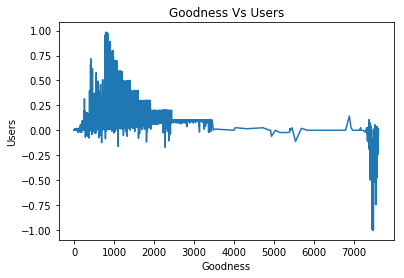

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

x_axis = []
y_axis = []
for k in goodness.keys():
    x_axis.append(k)
    y_axis.append(round(goodness[k], 4))

    
PrecisionGraph(x_axis,y_axis,'Goodness','Users')

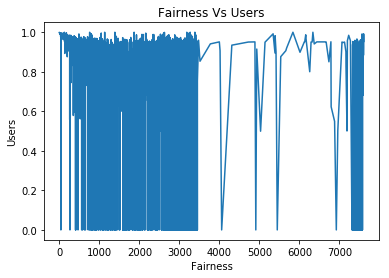

In [16]:
x_axis = []
y_axis = []
for k in fairness.keys():
    x_axis.append(k)
    y_axis.append(round(fairness[k], 4))

    
PrecisionGraph(x_axis,y_axis,'Fairness','Users')

In [17]:
#Question 2
import operator
trust_score = {}

def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_d

for edge in G.nodes():
    trust_score[edge] = fairness[edge] * goodness[edge]

for i in dict_sort_des(trust_score)[:10]:
    print i[0]

791
828
932
861
790
963
829
978
831
833


In [18]:
for i in dict_sort_des(trust_score)[-10:]:
    print i[0]

7481
7533
7541
7538
7452
7457
7449
7468
7479
7456


In [24]:
#Question -3
largest = max(nx.strongly_connected_components(G), key=len)
print len(largest)
print len(G.nodes)


3235
3783


In [0]:
# Function for Calculating Clustering Co-efficients.
def clusteringCoeff(tempGraph):
    degClusDict = dict()
    for eachNode in tempGraph.nodes():
        degClusDict[eachNode] = (tempGraph.degree(eachNode),nx.clustering(tempGraph,eachNode))
    final_Dict = dict()
    for key in degClusDict.keys():
        if degClusDict[key][0] in final_Dict:
            final_Dict[degClusDict[key][0]].append(degClusDict[key][1])
        else:
            final_Dict[degClusDict[key][0]] = [degClusDict[key][1]]
    for key in final_Dict:
        final_Dict[key] = float(sum(final_Dict[key]))/len(final_Dict[key])
    return final_Dict

k_Ck = clusteringCoeff(G)

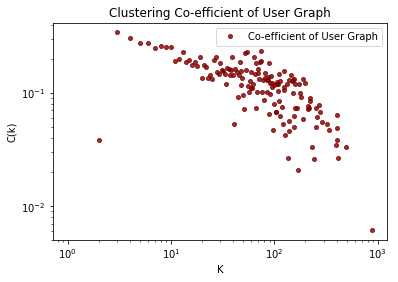

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
def getXYAxis(temp_Ck,maxDegree):
    plot_Ck_y = []
    plot_k_x = []
    for i in range(maxDegree+1):
        plot_k_x.append(i)
        if i in temp_Ck:
            plot_Ck_y.append(temp_Ck[i])
        else:
            plot_Ck_y.append(float(0)) 
    return plot_k_x,plot_Ck_y


k_maxDegree = max(k_Ck.items(), key=operator.itemgetter(0))[0]
k_plot_Ck_x,k_plot_Ck_y = getXYAxis(k_Ck,k_maxDegree)


plt.yscale('log')
plt.xscale('log')
plt.plot(k_plot_Ck_x, k_plot_Ck_y, label='Clustering Coefficient Graph',linewidth=0, marker='.',markersize=8, color='#800000', alpha=.8)
plt.title("Clustering Co-efficient of User Graph")
plt.ylabel("C(k)")
plt.xlabel("K")
plt.legend(['Co-efficient of User Graph'],loc = 'upper right')



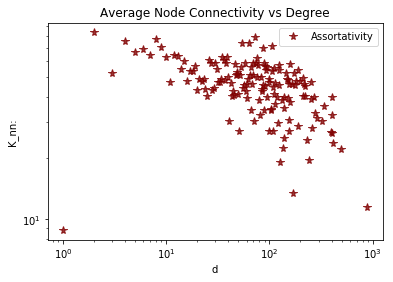

In [22]:
asrt_k = nx.k_nearest_neighbors(G)
maxAssrt = max(asrt_k.items(), key=operator.itemgetter(0))[0]
asrt_k

asrt_k_x_axis,asrt_k_y_axis = getXYAxis(asrt_k,maxAssrt)
plt.yscale('log')
plt.xscale('log')
plt.plot(asrt_k_x_axis, asrt_k_y_axis, label='Assortavity of Graph',linewidth=0, marker='*',markersize=8, color='#800000', alpha=.8)
plt.title("Average Node Connectivity vs Degree")
plt.ylabel("K_nn:")
plt.xlabel("d")
plt.legend(['Assortativity'])

To interpolate the scores to a single value, we multiply both fairness and goodness scores.

The fairness of a user is same as the reliability of the user. Thus, the users' fairness is same as reliability score.